# Google colab environment set-up

## github repo

In [1]:
import os
import sys
from getpass import getpass

In [2]:
user = getpass('GitHub user')
password = getpass('GitHub password/access token')
os.environ['GITHUB_AUTH'] = user + ':' + password

GitHub user··········
GitHub password/access token··········


In [3]:
!git clone https://$GITHUB_AUTH@github.com/feldman4/NatureProtocols.git

Cloning into 'NatureProtocols'...
remote: Enumerating objects: 239, done.
remote: Counting objects: 100% (239/239), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 239 (delta 114), reused 203 (delta 78), pack-reused 0
Receiving objects: 100% (239/239), 11.48 MiB | 21.11 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [4]:
os.chdir('NatureProtocols')

In [5]:
! git checkout LF

Branch 'LF' set up to track remote branch 'LF' from 'origin'.
Switched to a new branch 'LF'


In [6]:
! pip install -r requirements_gcolab.txt

     |████████████████████████████████| 13.1MB 319kB/s 
     |████████████████████████████████| 20.2MB 1.3MB/s 
     |████████████████████████████████| 10.0MB 47.6MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 12.4MB 42.1MB/s 
     |████████████████████████████████| 6.7MB 42.2MB/s 
     |████████████████████████████████| 184kB 48.6MB/s 
     |████████████████████████████████| 4.3MB 34.5MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
     |████████████████████████████████| 133kB 47.7MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 552kB 42.3MB/s 
     |████████████████████████████████| 460kB 44.4MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144806 sha256=daf63111fe265fa475a17bb86166a8ddbd140613be4c799d8a4d7c17bc53147c
  Stored in directory: /root/.cache

click "restart runtime" above after pip installing requirements_gcolab.txt. 

In [1]:
import sys, os

In [2]:
os.environ['PYTHONPATH'] = '/content/NatureProtocols/DF:'+os.environ['PYTHONPATH']

In [3]:
sys.path.append('/content/NatureProtocols/DF')

## ascp for downloading data from IDR

This code works for linux machines (including Google Colab). If using a different OS, Windows and Mac installers can be found here: https://downloads.asperasoft.com/en/downloads/62 

In [3]:
! wget https://download.asperasoft.com/download/sw/cli/3.9.6/ibm-aspera-cli-3.9.6.1467.159c5b1-linux-64-release.sh

--2020-07-04 19:34:06--  https://download.asperasoft.com/download/sw/cli/3.9.6/ibm-aspera-cli-3.9.6.1467.159c5b1-linux-64-release.sh
Resolving download.asperasoft.com (download.asperasoft.com)... 184.72.56.59
Connecting to download.asperasoft.com (download.asperasoft.com)|184.72.56.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15381687 (15M) [application/binary]
Saving to: ‘ibm-aspera-cli-3.9.6.1467.159c5b1-linux-64-release.sh’

ibm-aspera-cli-3.9. 100%[===================>]  14.67M  3.47MB/s    in 5.8s    

2020-07-04 19:34:13 (2.52 MB/s) - ‘ibm-aspera-cli-3.9.6.1467.159c5b1-linux-64-release.sh’ saved [15381687/15381687]



In [4]:
! bash ibm-aspera-cli-3.9.6.1467.159c5b1-linux-64-release.sh


Installing IBM Aspera CLI

Installation into /root/.aspera/cli successful

Optional installation steps:

  To include aspera in your PATH, run this command (or add it to .bash_profile):
    export PATH=/root/.aspera/cli/bin:$PATH

  To install the man page, run the following command:
    export MANPATH=/root/.aspera/cli/share/man:$MANPATH



In [5]:
os.environ['PATH'] = "/root/.aspera/cli/bin:"+os.environ['PATH']

In [6]:
! wget https://idr.openmicroscopy.org/about/img/aspera/asperaweb_id_dsa.openssh

--2020-07-04 19:34:19--  https://idr.openmicroscopy.org/about/img/aspera/asperaweb_id_dsa.openssh
Resolving idr.openmicroscopy.org (idr.openmicroscopy.org)... 193.62.52.66
Connecting to idr.openmicroscopy.org (idr.openmicroscopy.org)|193.62.52.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 668 [application/octet-stream]
Saving to: ‘asperaweb_id_dsa.openssh’

asperaweb_id_dsa.op 100%[===================>]     668  --.-KB/s    in 0s      

2020-07-04 19:34:19 (86.6 MB/s) - ‘asperaweb_id_dsa.openssh’ saved [668/668]



# imports

In [4]:
from ops.imports_ipython import *
from ops.utils import download_from_idr
import ops.firesnake
from ops.firesnake import Snake

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
df_files_idr = pd.read_csv('/content/NatureProtocols/files_idr.csv.gz')

# full analysis pipeline with example tile

## download an example tile of data from IDR

In [ ]:
df_files = (df_files_idr
 .query('cell_line == "A549 Cas9-blast"')
 .query('tile == "102" & well == "A1"')
)

In [ ]:
download_from_idr(df_files['file'].tolist(),dest_dir='/content/data')

Completed: 313770K bytes transferred in 14 seconds
 (176089K bits/sec), in 17 files.



In [ ]:
os.chdir('/content/data/experimentC')

## set parameters

In [ ]:
THRESHOLD_READS = 75  # threshold for detecting reads
THRESHOLD_DAPI = 1200  # threshold for segmenting nuclei
THRESHOLD_CELL = 800  # threshold for segmenting cells
NUCLEUS_AREA = 0.25*150, 0.25*800
WILDCARDS = dict(well='A1', tile='102')

## find input files

In [ ]:
search = 'input/*/10X*{well}_Tile-{tile}.sbs.tif'.format(**WILDCARDS)
input_files = natsorted(glob(search))
for f in input_files:
    print(f)

input/10X_c1-SBS-1/10X_c1-SBS-1_A1_Tile-102.sbs.tif
input/10X_c2-SBS-2/10X_c2-SBS-2_A1_Tile-102.sbs.tif
input/10X_c3-SBS-3/10X_c3-SBS-3_A1_Tile-102.sbs.tif
input/10X_c4-SBS-4/10X_c4-SBS-4_A1_Tile-102.sbs.tif
input/10X_c5-SBS-5/10X_c5-SBS-5_A1_Tile-102.sbs.tif
input/10X_c7-SBS-7/10X_c7-SBS-7_A1_Tile-102.sbs.tif
input/10X_c8-SBS-8/10X_c8-SBS-8_A1_Tile-102.sbs.tif
input/10X_c9-SBS-9/10X_c9-SBS-9_A1_Tile-102.sbs.tif
input/10X_c10-SBS-10/10X_c10-SBS-10_A1_Tile-102.sbs.tif


In [ ]:
# set output filename format
description = parse(input_files[0])
description['subdir'] = 'process_ipynb'
description.pop('cycle');

## load, align, apply Laplacian-of-Gaussian filter (log)

In [ ]:
# load and align data
data = np.array([read(f) for f in input_files])
aligned = Snake._align_SBS(data, method='DAPI')
save(name(description, tag='aligned'), aligned)


In [ ]:
# filter SBS channels with Laplacian-of-Gaussian (LoG) filter
loged = Snake._transform_log(aligned, skip_index=0)
save(name(description, tag='log'), loged)

In [ ]:
# dilate sequencing spots by max filtering LoG-ed images
maxed = Snake._max_filter(loged, 3, remove_index=0)
save(name(description, tag='maxed'), maxed)

## detect candidate reads

In [ ]:
std = Snake._compute_std(loged, remove_index=0)
save(name(description, tag='std'), std)

peaks = Snake._find_peaks(std)
save(name(description, tag='peaks'), peaks)


## segment nuclei and cells


In [ ]:
nuclei = Snake._segment_nuclei(data[0], THRESHOLD_DAPI,
 area_min=NUCLEUS_AREA[0], area_max=NUCLEUS_AREA[1])
save(name(description, tag='nuclei'), nuclei)

cells = Snake._segment_cells(data[0], nuclei, THRESHOLD_CELL)
save(name(description, tag='cells'), cells)

/usr/local/lib/python3.6/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,
/usr/local/lib/python3.6/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


## extract base intensity, call reads, assign to cells

In [ ]:
df_bases = Snake._extract_bases(maxed, peaks, cells, 
                        THRESHOLD_READS, wildcards=WILDCARDS)
df_bases.to_csv(name(description, tag='bases', ext='csv'), index=None)

df_reads = Snake._call_reads(df_bases)
filename = name(description, tag='reads', ext='csv')
df_reads.to_csv(filename, index=None)

In [ ]:
# read from csv to match numerical precision of snakemake pipeline
df_reads = pd.read_csv(filename) 
df_cells = Snake._call_cells(df_reads)
df_cells.to_csv(name(description, tag='cells', ext='csv'), index=None)

## save processed data to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content')

In [ ]:
! cp -r /content/data/experimentC/process_ipynb/ /content/drive/My\ Drive

# guidance for choosing THRESHOLD_READS parameter

The THRESHOLD_READS parameter determines which spots are included as sequencing reads in the "bases," "reads," and "cells" tables. Selecting the parameter is recommended to be completed by first analyzing a couple tiles per well with a very low threshold, and then analyzing how the read mapping rate to expected barcodes changes as the threshold is increased.

Following is an example of how to do this using 2 randomly selected tiles per well of "experimentC" in the IDR dataset. The example snakemake file was modified by changing THRESHOLD_READS to 10 and only analyzing the selected tiles. Included here is a table of concatenated "reads.csv" results from all of these tiles.

In [5]:
import ops.qc

In [6]:
BARCODES = pd.read_csv('/content/NatureProtocols/example_data/barcodes.txt', header=None)[0]

In [10]:
df_reads = pd.read_csv('/content/NatureProtocols/example_data/experimentC_sample_tile_reads.csv')

## plot mapping vs peak threshold split by sample tile

Also plotted here with a red dotted line is the THRESHOLD_READS value of 75, chosen for analyzing the entire plate.

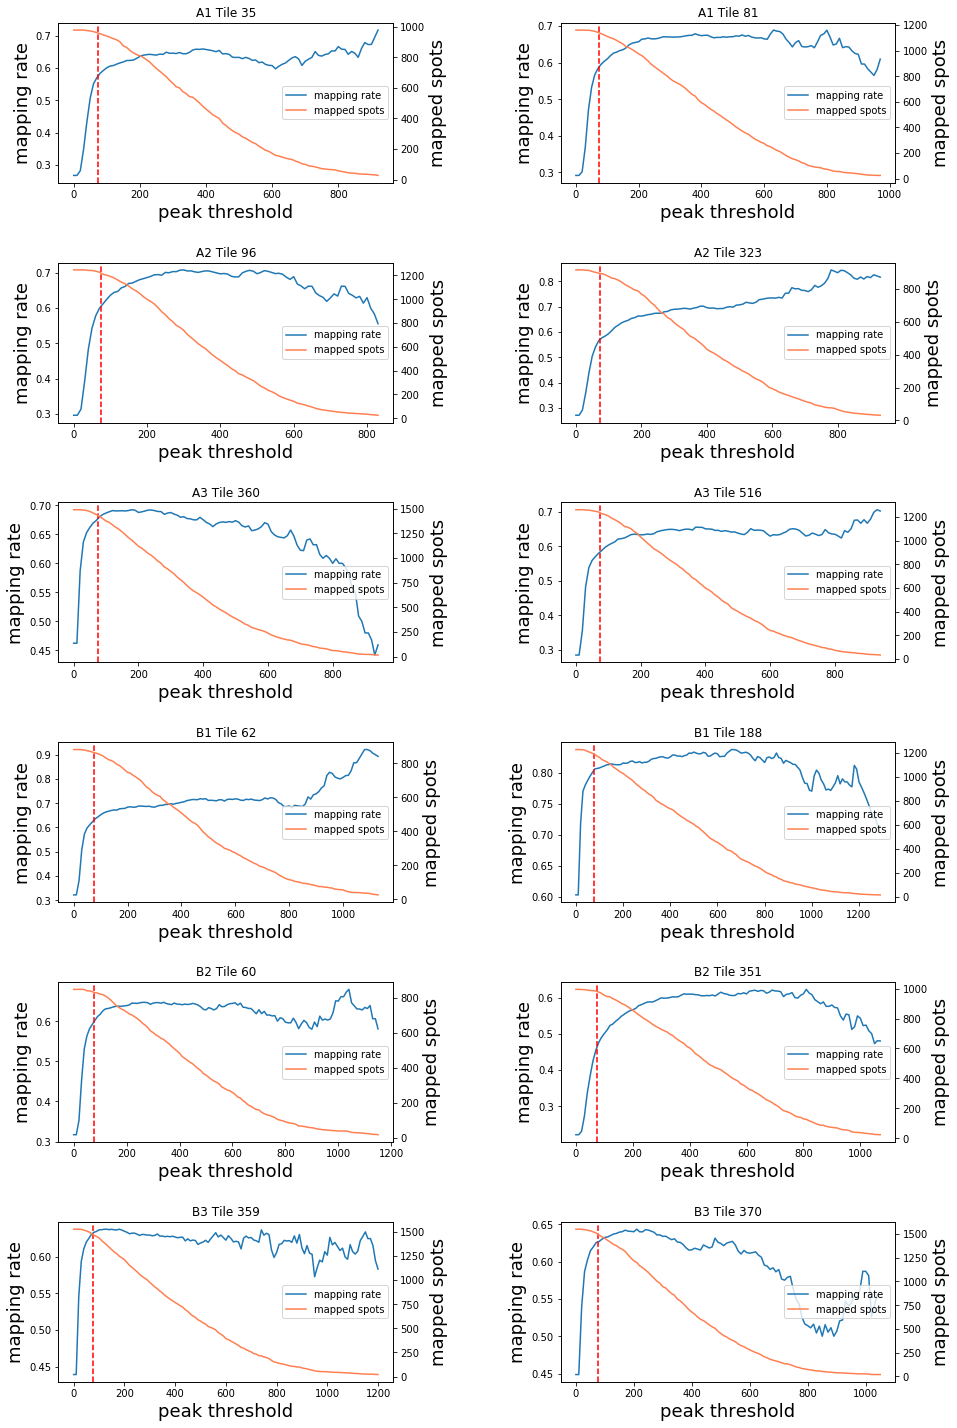

In [11]:
fig,axes=plt.subplots(6,2,figsize=(15,25),gridspec_kw={'wspace':0.5,'hspace':0.5})

for ax, ((well, tile), df_tile) in zip(axes.reshape(-1),df_reads.groupby(['well','tile'])):
  ops.qc.plot_mapping_vs_threshold(df_tile, barcodes=BARCODES, threshold_var='peak',ax=ax)
  ax.set_title('{well} Tile {tile}'.format(well=well,tile=tile))
  ax.axvline(x=75,color='red',linestyle='--')

## plot mapping vs peak threshold for all sample tiles

Also plotted here with a red dotted line is the THRESHOLD_READS value of 75, chosen for analyzing the entire plate.

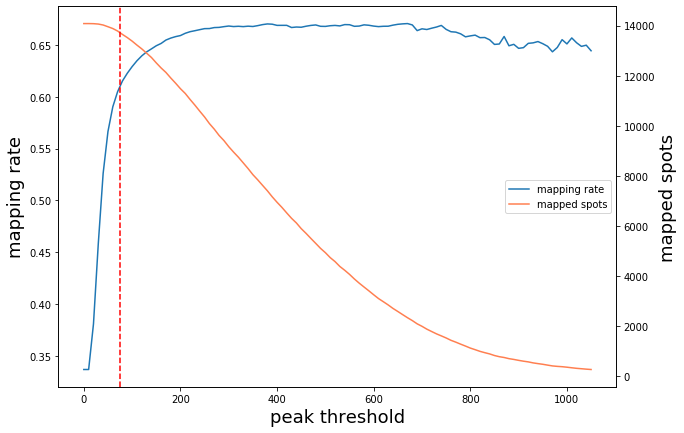

In [12]:
plt.figure(figsize=(10,7))
df_summary = ops.qc.plot_mapping_vs_threshold(df_reads,barcodes=BARCODES,threshold_var='peak')
plt.axvline(x=75,color='red',linestyle='--')